In [4]:
import numpy as np
import matplotlib.pyplot as plt
import moma_linear_predictions as lp 

### (1)Create the three model dataset we aim to infer

Text(0.5, 1.0, 'Bilinear with lag case ')

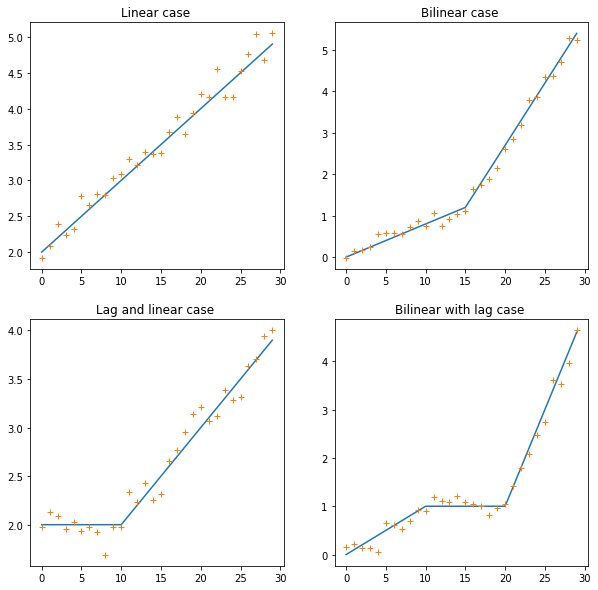

In [133]:
fig, axs = plt.subplots(2,2,figsize=(10, 10))
time = np.arange(30)
### Linear case (sg= standard deviation of measurment error)
slope = 0.1; x_0 = 2. ; sg = 0.15
x_linear = lp.build_D_vec2(time, None, None, True)
x_linear = slope*x_linear+x_0 
x_linear_noise = np.random.normal(x_linear,sg)
axs[0,0].plot(time,x_linear)
axs[0,0].plot(time,x_linear_noise,'+')
axs[0,0].set_title('Linear case ')
#### Lag and linear growth case 
slope = 0.1; x_0 = 2. ; sg = 0.15;tau1=10
x_lag = lp.build_D_vec2(time, tau1, False, False)
x_lag = slope*x_lag+x_0 
x_lag_noise = np.random.normal(x_lag,sg)
axs[1,0].plot(time,x_lag)
axs[1,0].plot(time,x_lag_noise,'+')
axs[1,0].set_title('Lag and linear case ')
#### Bilinear case 
slope1 = 0.08;slope2=0.15; x_0 = 2.;sg = 0.15;tau1=15
D0,D1 = lp.build_D_vec2(time, tau1, tau1, False)
x_bilin = slope1*D0+slope2*D1*+x_0 
x_bilin_noise = np.random.normal(x_bilin,sg)
axs[0,1].plot(time,x_bilin)
axs[0,1].plot(time,x_bilin_noise,'+')
axs[0,1].set_title('Bilinear case ')

#### Bilinear with lag case 
slope1 = 0.1;slope2=0.2; x_0 = 2.;sg = 0.15;tau1=10; tau2=20
D0,D1 = lp.build_D_vec2(time, tau1, tau2, False)
x_lag_bilin = slope1*D0+slope2*D1*+x_0 
x_lag_bilin_noise = np.random.normal(x_lag_bilin,sg)
axs[1,1].plot(time,x_lag_bilin)
axs[1,1].plot(time,x_lag_bilin_noise,'+')
axs[1,1].set_title('Bilinear with lag case ')




#### (2) Linear fit
First let's do a simple linear fit for the tree different models. To do this we simply call the function predict

In [149]:
x_linear_lfit = lp.predict(x_linear_noise,linear=True,lag_linear=False,linear_lag_linear=False,bilinear=False)
x_lag_lfit = lp.predict(x_lag_noise,linear=True,lag_linear=False,linear_lag_linear=False,bilinear=False)
x_bilin_lfit = lp.predict(x_bilin_noise,linear=True,lag_linear=False,linear_lag_linear=False,bilinear=False)
x_lag_bilin_lfit=lp.predict(x_lag_bilin_noise,linear=True,lag_linear=False,linear_lag_linear=False,bilinear=False)

Text(0.5, 1.0, 'Bilinear with lag case ')

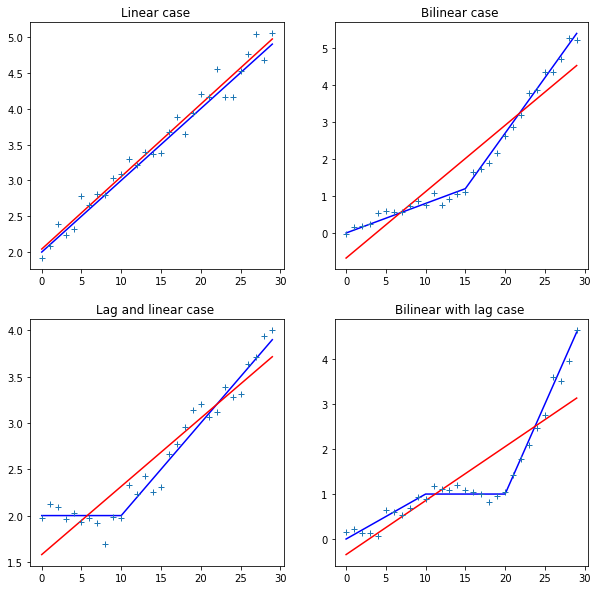

In [150]:
fig, axs = plt.subplots(2,2,figsize=(10, 10))
time = np.arange(30)
### Linear case
axs[0,0].plot(time,x_linear,'b')
axs[0,0].plot(time,x_linear_lfit,'r')
axs[0,0].plot(time,x_linear_noise,'+')
axs[0,0].set_title('Linear case ')
#### Lag and linear growth case 
axs[1,0].plot(time,x_lag,'b')
axs[1,0].plot(time,x_lag_lfit,'r')
axs[1,0].plot(time,x_lag_noise,'+')
axs[1,0].set_title('Lag and linear case ')
#### Bilinear case 
axs[0,1].plot(time,x_bilin,'b')
axs[0,1].plot(time,x_bilin_lfit,'r')
axs[0,1].plot(time,x_bilin_noise,'+')
axs[0,1].set_title('Bilinear case ')

#### Bilinear with lag case 
axs[1,1].plot(time,x_lag_bilin,'b')
axs[1,1].plot(time,x_lag_bilin_lfit,'r')
axs[1,1].plot(time,x_lag_bilin_noise,'+')
axs[1,1].set_title('Bilinear with lag case ')




If we want to look at the parameters inferred we simply call the function predict_param. For example

In [136]:
print(lp.predict_param(x_linear_noise,linear=True,lag_linear=False,linear_lag_linear=False))

{'param': {'c0': array([[2.04221636]]), 'sigmas': 0.020778370606754113, 'd0': array([[0.10101811]]), 'tau1': None, 'tau2': None}, 'log_lik': array([[11.12523389]])}


infers an offset c0=1.92 very close to the offset we provided (x0=2). The predicted slope d0=0.104 is also very close to the real one (slope=0.1). The variance in the measurment error sigmas is close to the variance of the given one sg**2 (sg is the standard deviation). We also return the log_likelihood of this model

#### (3) lag_linear fit
in a similar way we can do predictions using the lag_linear fit

In [151]:
x_linear_llfit = lp.predict(x_linear_noise,linear=False,lag_linear=True,linear_lag_linear=False,bilinear=False)
x_lag_llfit = lp.predict(x_lag_noise,linear=False,lag_linear=True,linear_lag_linear=False,bilinear=False)
x_bilin_llfit = lp.predict(x_bilin_noise,linear=False,lag_linear=True,linear_lag_linear=False,bilinear=False)
x_lag_bilin_llfit=lp.predict(x_lag_bilin_noise,linear=False,lag_linear=True,linear_lag_linear=False,bilinear=False)

Text(0.5, 1.0, 'Bilinear with lag case ')

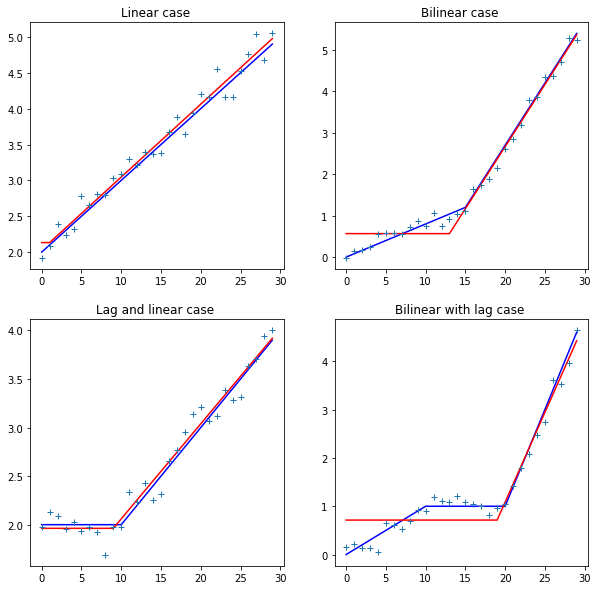

In [152]:
fig, axs = plt.subplots(2,2,figsize=(10, 10))
time = np.arange(30)
### Linear case
axs[0,0].plot(time,x_linear,'b')
axs[0,0].plot(time,x_linear_llfit,'r')
axs[0,0].plot(time,x_linear_noise,'+')
axs[0,0].set_title('Linear case ')
#### Lag and linear growth case 
axs[1,0].plot(time,x_lag,'b')
axs[1,0].plot(time,x_lag_llfit,'r')
axs[1,0].plot(time,x_lag_noise,'+')
axs[1,0].set_title('Lag and linear case ')
#### Bilinear case 
axs[0,1].plot(time,x_bilin,'b')
axs[0,1].plot(time,x_bilin_llfit,'r')
axs[0,1].plot(time,x_bilin_noise,'+')
axs[0,1].set_title('Bilinear case ')

#### Bilinear with lag case 
axs[1,1].plot(time,x_lag_bilin,'b')
axs[1,1].plot(time,x_lag_bilin_llfit,'r')
axs[1,1].plot(time,x_lag_bilin_noise,'+')
axs[1,1].set_title('Bilinear with lag case ')


Again if we want to look to parameters we simply call the function predict_params. For example

In [139]:
print(lp.predict_param(x_lag_noise,linear=False,lag_linear=True,linear_lag_linear=False))

{'param': {'c0': array([[1.96246009]]), 'sigmas': 0.014935798112387183, 'd0': array([[0.0978447]]), 'tau1': 9, 'tau2': False}, 'log_lik': array([[15.98403056]])}


where c0 is the offset, sigmas is the variance in measurment noise, d0 the slope, tau1 the duration of the lag,

#### (4) Bilinear predictions 

In [159]:
x_linear_blfit = lp.predict(x_linear_noise,linear=False,lag_linear=False,linear_lag_linear=False,bilinear=True)
x_lag_blfit = lp.predict(x_lag_noise,linear=False,lag_linear=False,linear_lag_linear=False,bilinear=True)
x_bilin_blfit = lp.predict(x_bilin_noise,linear=False,lag_linear=False,linear_lag_linear=False,bilinear=True)
x_lag_bilin_blfit=lp.predict(x_lag_bilin_noise,linear=False,lag_linear=False,linear_lag_linear=False,bilinear=True)

Text(0.5, 1.0, 'Bilinear with lag case ')

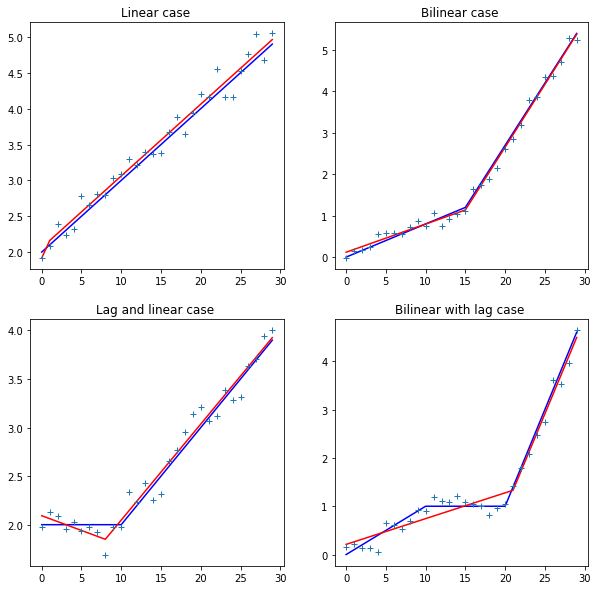

In [160]:
fig, axs = plt.subplots(2,2,figsize=(10, 10))
time = np.arange(30)
### Linear case
axs[0,0].plot(time,x_linear,'b')
axs[0,0].plot(time,x_linear_blfit,'r')
axs[0,0].plot(time,x_linear_noise,'+')
axs[0,0].set_title('Linear case ')
#### Lag and linear growth case 
axs[1,0].plot(time,x_lag,'b')
axs[1,0].plot(time,x_lag_blfit,'r')
axs[1,0].plot(time,x_lag_noise,'+')
axs[1,0].set_title('Lag and linear case ')
#### Bilinear case 
axs[0,1].plot(time,x_bilin,'b')
axs[0,1].plot(time,x_bilin_blfit,'r')
axs[0,1].plot(time,x_bilin_noise,'+')
axs[0,1].set_title('Bilinear case ')

#### Bilinear with lag case 
axs[1,1].plot(time,x_lag_bilin,'b')
axs[1,1].plot(time,x_lag_bilin_blfit,'r')
axs[1,1].plot(time,x_lag_bilin_noise,'+')
axs[1,1].set_title('Bilinear with lag case ')


This model predicts no lag in the simple bilinear case and a lag in the "bilinear with lag" case. The parameters of these two models are simply

In [162]:
print(lp.predict_param(x_bilin_noise,linear=False,lag_linear=False,linear_lag_linear=False,bilinear=True))


{'param': {'c0': array([[0.11790478]]), 'sigmas': 0.01563311359709742, 'd1': array([[0.06801458]]), 'd2': array([[0.30299775]]), 'tau1': 15, 'tau2': 15}, 'log_lik': array([[12.63604429]])}


### (5) The linear lag linear model

In [163]:
x_linear_lblfit = lp.predict(x_linear_noise,linear=False,lag_linear=False,linear_lag_linear=True,bilinear=False)
x_lag_lblfit = lp.predict(x_lag_noise,linear=False,lag_linear=False,linear_lag_linear=True,bilinear=False)
x_bilin_lblfit = lp.predict(x_bilin_noise,linear=False,lag_linear=False,linear_lag_linear=True,bilinear=False)
x_lag_bilin_lblfit=lp.predict(x_lag_bilin_noise,linear=False,lag_linear=False,linear_lag_linear=True,bilinear=False)

Text(0.5, 1.0, 'Bilinear with lag case ')

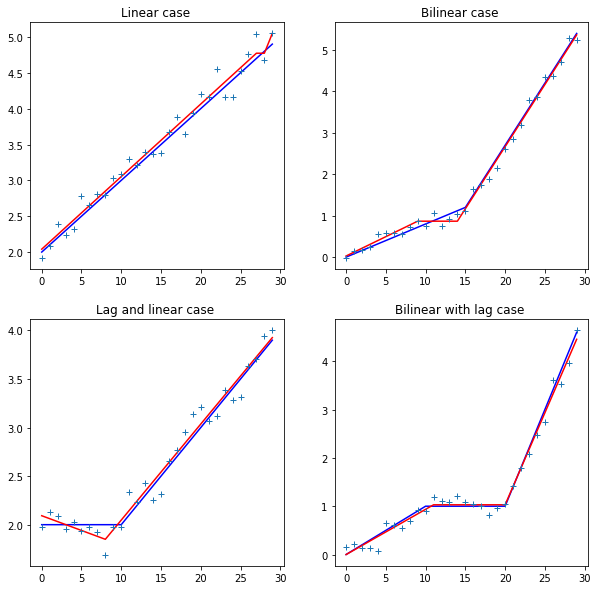

In [164]:
fig, axs = plt.subplots(2,2,figsize=(10, 10))
time = np.arange(30)
### Linear case
axs[0,0].plot(time,x_linear,'b')
axs[0,0].plot(time,x_linear_lblfit,'r')
axs[0,0].plot(time,x_linear_noise,'+')
axs[0,0].set_title('Linear case ')
#### Lag and linear growth case 
axs[1,0].plot(time,x_lag,'b')
axs[1,0].plot(time,x_lag_blfit,'r')
axs[1,0].plot(time,x_lag_noise,'+')
axs[1,0].set_title('Lag and linear case ')
#### Bilinear case 
axs[0,1].plot(time,x_bilin,'b')
axs[0,1].plot(time,x_bilin_lblfit,'r')
axs[0,1].plot(time,x_bilin_noise,'+')
axs[0,1].set_title('Bilinear case ')

#### Bilinear with lag case 
axs[1,1].plot(time,x_lag_bilin,'b')
axs[1,1].plot(time,x_lag_bilin_lblfit,'r')
axs[1,1].plot(time,x_lag_bilin_noise,'+')
axs[1,1].set_title('Bilinear with lag case ')

Again the model parameters are given by

In [165]:
print(lp.predict_param(x_bilin_noise,linear=False,lag_linear=False,linear_lag_linear=True,bilinear=False))


{'param': {'c0': array([[0.02722075]]), 'sigmas': 0.015147832463975833, 'd1': array([[0.09334216]]), 'd2': array([[0.29981759]]), 'tau1': 9, 'tau2': 14}, 'log_lik': array([[13.51011634]])}
